** ** 

<figure>
<div style="text-align:center"><img src="./img/temp_circ.png" /></div>
<p><center>Detail of the experimental setup.</center></p>
</figure>

# Calibration (Method 2)

** **

* This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import the libraries

In [1]:
#uncomment the following lines to install lmfit

#from subprocess import call
# call(['pip', 'install', 'lmfit'])
# call(['pip', 'install', 'matplotlib'])
#call(['pip', 'install', 'ipympl'])

#install pymc3
#%pip install pymc3

In [2]:
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from lmfit.models import PolynomialModel, SplineModel, ExponentialModel, LinearModel
from lmfit import Minimizer, Parameters
import lmfit

## Load the data

* The points that define the calibration curve were extracted from the printed version of the curve included with the Lake Shore manual. Presumably, the intended method of estimating the temperature involved using a pencil and ruler on the printed calibration curve.

* To make it easier to convert the measured resistance values to temperature values I replicated the curve here such that it can be reused for subsequent measurements. 

* This technique only facilitates the conversion of resistance values to temperature.

* Reverse engineering the factory calibration curve is not the most accurate method of measuring the instrument response but certain assumptions can be made about the accuracy based on the age of the instruments.

In [17]:
#Import some of the points that lie on the factory calibration curve
data = pd.read_csv('./Data/Lake_Shore_xy.csv', sep = " ", header = None)

#Preview the data 
data.head()

,0,1
0,1.1,100000.0
1,2.0,9500.0
2,3.0,3000.0
3,5.0,1000.0
4,6.0,700.0


## Data Wrangling

In [4]:
# Rename the columns
data.rename(columns={0: "Temperature", 1: "Resistance"}, inplace=True)

# preview the data
data.head()

,Temperature,Resistance
0,1.1,100000.0
1,2.0,9500.0
2,3.0,3000.0
3,5.0,1000.0
4,6.0,700.0


In [5]:
#To facilitate the linear analysis we transform the variables by taking the log
data["log_Temp"] = np.log(data["Temperature"])
data["log_Res"] = np.log(data["Resistance"])

# Preview the data
data.head()

,Temperature,Resistance,log_Temp,log_Res
0,1.1,100000.0,0.095310,11.512925
1,2.0,9500.0,0.693147,9.159047
2,3.0,3000.0,1.098612,8.006368
3,5.0,1000.0,1.609438,6.907755
4,6.0,700.0,1.791759,6.551080


0     0.095310
1     0.693147
2     1.098612
3     1.609438
4     1.791759
5     1.974081
6     2.079442
7     2.197225
8     2.302585
9     2.995732
10    3.367296
11    3.688879
12    3.912023
13    4.094345
14    4.248495
15    4.499810
16    4.605170
Name: log_Temp, dtype: float64


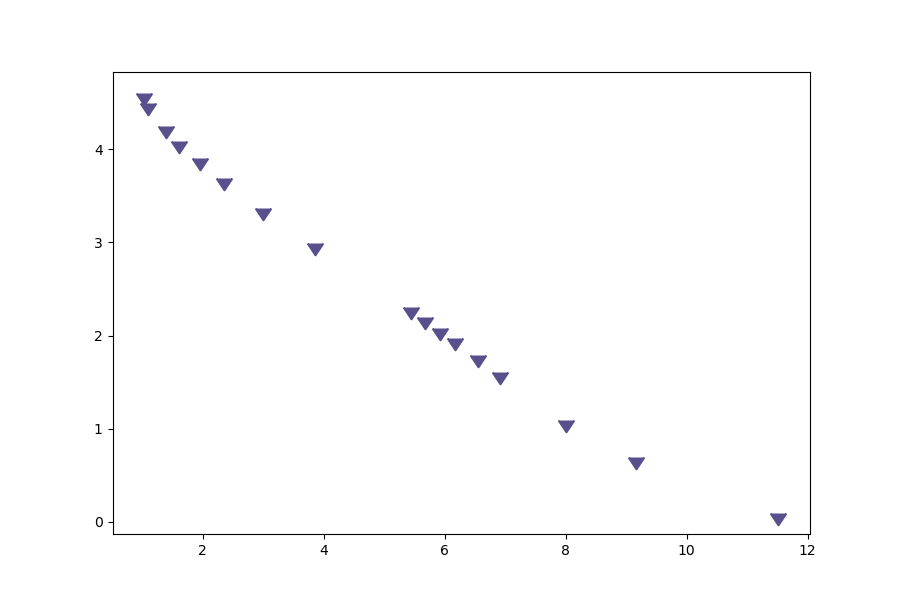

In [6]:
# Assign the x, y variables
x = data["log_Res"]
y = data["log_Temp"]

# Preview the y values in order to select spline knots
print(y)

#Plot the scatter of the points to estimate knot positions
#Uncomment the line below to make the graph interactive
%matplotlib widget

#Set the figure size
plt.figure(figsize=(9,6))

#Plot the data
plt.scatter(x, y, marker=11, c = '#58508d', s = 128)

#Show the graph
plt.show()

## Define the model, fit, and print the results

In [7]:
#use builtin NameModel, specify prefix for each:
mod1 = SplineModel(np.array(np.sort([4.499810, 4.248495, 3.367296, 2.995732, 2.302585, 1.609438, 1.098612, 0.693147, 0.09531])),prefix='p1_')

In [8]:
#set initial parameters
pars1 = mod1.guess(y, x=x)      

In [9]:
#fit using 1 / yerr
result1 = mod1.fit(y, pars1, x=x, weights = 1. / (y * 0.0124))

#print the Fit Statistics and parameters
print('------------------------------------------------------')
print(result1.fit_report())
print('------------------------------------------------------')

------------------------------------------------------
[[Model]]
    Model(spline_model, prefix='p1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 17
    # variables        = 9
    chi-square         = 8.03595793
    reduced chi-square = 1.00449474
    Akaike info crit   = 5.26211875
    Bayesian info crit = 12.7610388
    R-squared          = 0.73976279
[[Variables]]
    p1_s0:  86.7908538 +/- 356.298485 (410.53%) (init = 4.58761)
    p1_s1:  5.50836890 +/- 1.30063995 (23.61%) (init = 4.58761)
    p1_s2:  4.53509968 +/- 0.27623165 (6.09%) (init = 4.457924)
    p1_s3:  4.05104739 +/- 0.11324030 (2.80%) (init = 4.089649)
    p1_s4:  3.71526178 +/- 0.09115152 (2.45%) (init = 3.672473)
    p1_s5:  3.40870356 +/- 0.04141149 (1.21%) (init = 3.358966)
    p1_s6:  3.11847153 +/- 0.02503524 (0.80%) (init = 3.358966)
    p1_s7:  2.90039044 +/- 0.01830408 (0.63%) (init = 2.942135)
    p1_s8:  2.73026268 +/- 0.01505967 (0.55%) (init = 2

## Plot the data

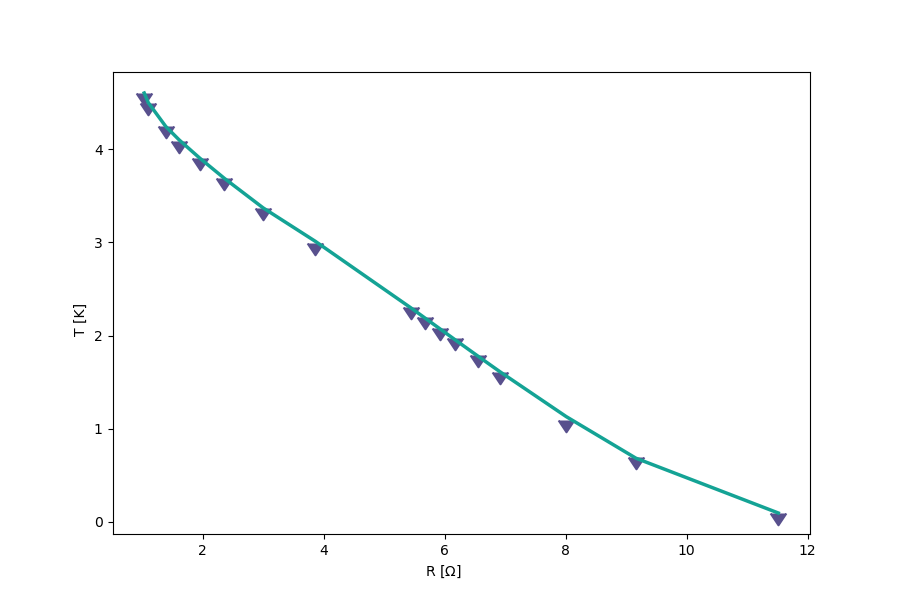

In [10]:
#Uncomment the line below to make the graph interactive
%matplotlib widget

#Set the figure size
plt.figure(figsize=(9,6))

#Plot the calibration curve
plt.scatter(x, y, marker=11, c = '#58508d', s = 128)
plt.plot(x, result1.best_fit, '#14a395', linewidth=2.5)
plt.ylabel(r'T [K]', ha='right')
plt.xlabel(r'R [$\Omega$]', ha='right')

#plt.xscale("log")
#plt.yscale("log")

#Show the plot
plt.show()

## Evaluate the model using residual plots

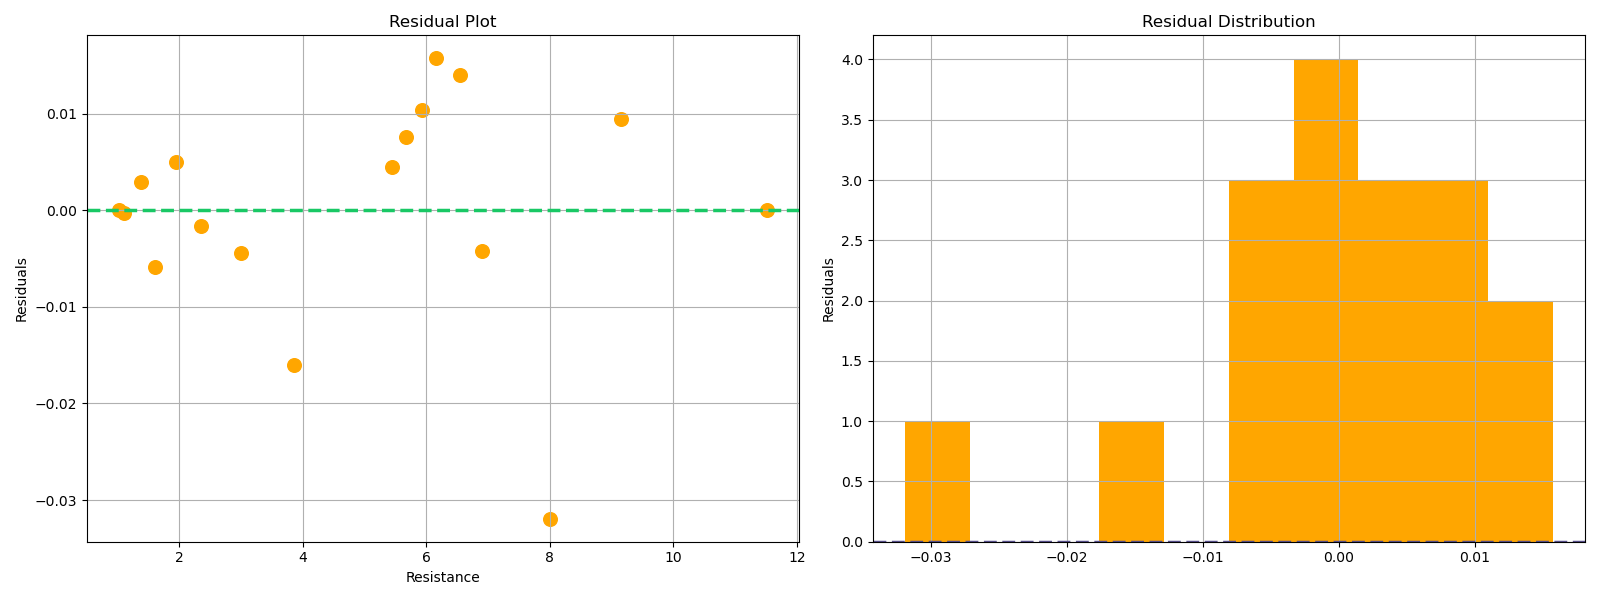

In [11]:
# Calculate residuals
pol2_residuals = y - result1.eval()

# Create a 2x2 subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the calibration curve
ax1 = axes[0]
ax1.scatter(x, pol2_residuals, color='#ffa600', s=96)
ax1.axhline(y=0, color='#19c865', linestyle='--', linewidth=2.5)
ax1.set_xlabel('Resistance')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Plot')
ax1.grid(True)
ax1.grid(True)

# Plot residuals
ax2 = axes[1]
ax2.hist(pol2_residuals, color='#ffa600')
ax2.axhline(y=0, color='#58508d', linestyle='--', linewidth=2.5)
#ax2.set_xlabel('Standard Gamma Energies')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Distribution')
ax2.grid(True)

plt.tight_layout()
plt.show()

## Make estimations

In [12]:
#Run the measured resistance values through the model
temp = np.array(result1.eval(pars1, x = np.log([207, 312, 402, 481, 555, 620, 687, 757, 857, 
                                                       937, 1030, 1045, 1085, 1116, 1152, 1169, 1184, 
                                                       1198, 1220, 1244, 1263, 1303, 1313])))
#suppress scientific notation
np.set_printoptions(suppress=True)

#Print the estimated (log-transformed) temperature values
print('------------------------------------------------------------------------')
print(temp)

------------------------------------------------------------------------
[ 3.6702818   4.80450356  5.85629914  6.78777189  7.65185531  8.39901446
  9.15530204  9.92934011 11.0059368  11.84279667 12.78928923 12.93937674
 13.33621053 13.64041186 13.99008964 14.15389754 14.29774168 14.43141625
 14.64035686 14.86675118 15.04485517 15.41661811 15.50889221]


In [13]:
#Take the exponent (antilog) of the log-transformed values to convert to actual temperatures 
temp_K = np.exp(temp)

#suppress the scientific notation
np.set_printoptions(suppress=True)

#print the estimated temperature values
print('------------------------------------------------------------------------')
print(temp_K)

------------------------------------------------------------------------
[     39.26296845     122.0588814      349.42856356     886.93516571
    2104.54656511    4442.6861658     9464.48872666   20523.79260159
   60230.65953129  139078.89850402  358358.52625969  416389.64239947
  619216.67382498  839374.16854887 1190744.90219383 1402683.21441869
 1619684.09031388 1851332.56875729 2281530.08255526 2861198.57413319
 3418988.02472402 4958521.19142099 5437838.52349732]


**The spline model produces a good reproduction of the factory calibration curve but is not that good for prediction.**

## Use polynomial regression instead of the spline model

Below, we redefine the model and optimize for best fit. 

------------------------------------------------------
[[Model]]
    Model(polynomial, prefix='p2_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 17
    # variables        = 3
    chi-square         = 14.7444964
    reduced chi-square = 1.05317832
    Akaike info crit   = 3.58016125
    Bayesian info crit = 6.07980129
    R-squared          = 0.52251286
[[Variables]]
    p2_c0:  5.22350760 +/- 0.09376409 (1.80%) (init = 5.089016)
    p2_c1: -0.65492236 +/- 0.02424949 (3.70%) (init = -0.5997358)
    p2_c2:  0.01819221 +/- 0.00145897 (8.02%) (init = 0.01407808)
[[Correlations]] (unreported correlations are < 0.100)
    C(p2_c1, p2_c2) = -0.9868
    C(p2_c0, p2_c1) = -0.9446
    C(p2_c0, p2_c2) = +0.8795
------------------------------------------------------


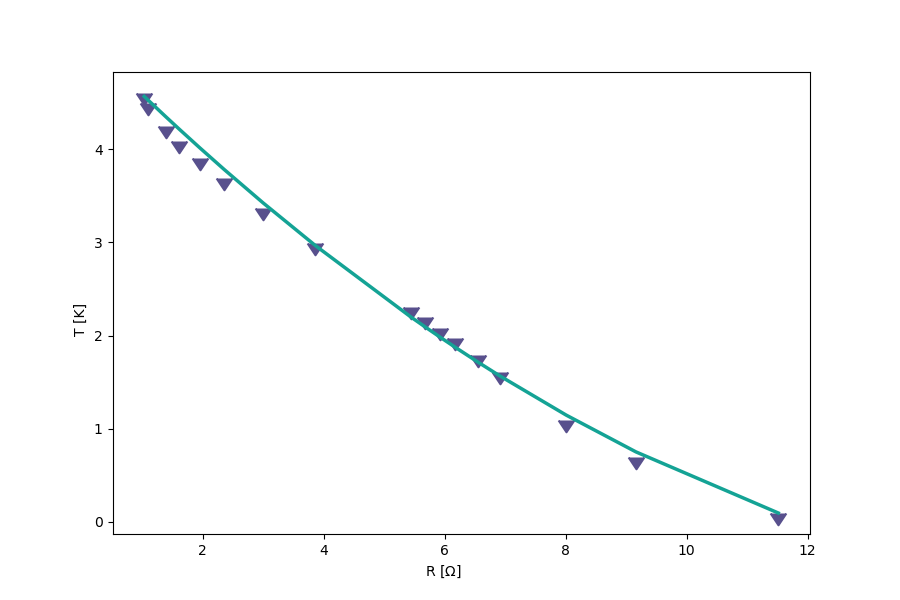

In [14]:
#use builtin NameModel, specify prefix for each:
mod2 = PolynomialModel(2, prefix='p2_')

#set initial parameters
pars2 = mod2.guess(y, x=x)    

#fit with weights=1./yerr
result2 = mod2.fit(y, pars2, x=x, weights = 1. / (y * 0.04))

#print the Fit Statistics and parameters
print('------------------------------------------------------')
print(result2.fit_report())
print('------------------------------------------------------')

#Uncomment the line below to make the graph interactive
%matplotlib widget

#Set the figure size
plt.figure(figsize=(9,6))

#Plot the calibration curve
plt.scatter(x, y, marker=11, c = '#58508d', s = 128)
plt.plot(x, result2.best_fit, '#14a395', linewidth=2.5)
plt.ylabel(r'T [K]', ha='right')
plt.xlabel(r'R [$\Omega$]', ha='right')

#plt.xscale("log")
#plt.yscale("log")

#Show the plot
plt.show()

## Evaluate the model using residual plots

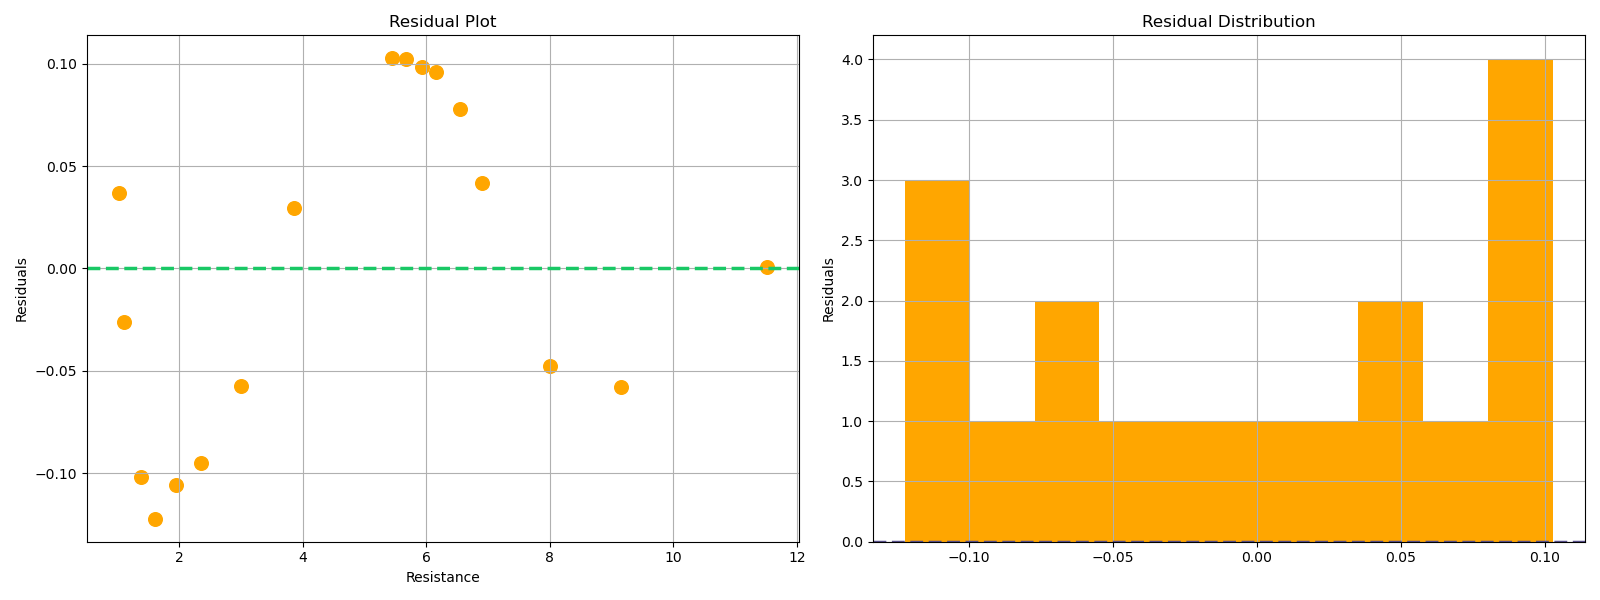

In [15]:
# Calculate residuals
pol2_residuals = y - result2.eval()

# Create a 2x2 subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the calibration curve
ax1 = axes[0]
ax1.scatter(x, pol2_residuals, color='#ffa600', s=96)
ax1.axhline(y=0, color='#19c865', linestyle='--', linewidth=2.5)
ax1.set_xlabel('Resistance')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Plot')
ax1.grid(True)
ax1.grid(True)

# Plot residuals
ax2 = axes[1]
ax2.hist(pol2_residuals, color='#ffa600')
ax2.axhline(y=0, color='#58508d', linestyle='--', linewidth=2.5)
#ax2.set_xlabel('Standard Gamma Energies')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Distribution')
ax2.grid(True)

plt.tight_layout()
plt.show()

## Make estimates

In [16]:
# Run the measured resistance values through the model 
temp2 = np.array(result2.eval(pars2, x = np.log([207, 312, 402, 481, 555, 620, 687, 757, 857, 
                                                       937, 1030, 1045, 1085, 1116, 1152, 1169, 1184, 
                                                       1198, 1220, 1244, 1263, 1303, 1313])))
#Suppress scientific notaion
np.set_printoptions(suppress=True)

#Take the exponent (antilog) of the log-transformed values to convert to actual temperatures 
temp2_K = np.exp(temp2)

# Print the estimated temperature values
print('------------------------------------------------------')
print(temp2_K)

------------------------------------------------------
[9.88625044 8.24046102 7.38123653 6.83519217 6.43295378 6.14039815
 5.88303658 5.65115503 5.3699797  5.1778127  4.9827763  4.9537418
 4.87923069 4.82421236 4.76307726 4.73517611 4.71104859 4.68893173
 4.65493389 4.61885848 4.59101642 4.53436454 4.52059927]


**Comparing the temperature values determined graphically (i.e. [10.504, 8.63, 7.767, 7.141, 6.634, 6.338, 6.013, 5.765, 5.489, 5.171, 4.923, 4.8889, 4.804, 4.72, 4.655, 4.622, 4.557, 4.478, 4.447, 4.416, 4.4, 4.37, 4.354]) with the ones predicted by the model we observe that the results appear to be sound and the model works. Of course, either of these methods are approximate and the highest level of accuracy can be achieved only by using a calibrator. A calibrator was not available for this experiment and therefore a certain level of ohm meter drifting should be assumed due to the age of the equipment.**     

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>